# Name - Anushka Anil Panhale

## spam data

In [2]:
import pandas as pd
import string
import nltk           
from nltk.corpus import stopwords


In [3]:
sp=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Codsoft\spam.csv", encoding='latin1')

In [4]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Removing Nulls

In [5]:
sp1=sp.where((pd.notnull(sp)),'')

In [6]:
sp1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


## Drop & Rename & Replace Columns

In [7]:
sp=sp1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
sp.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [9]:
sp

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
sp.y.replace({'ham':0,'spam':1},inplace=True)

In [11]:
sp

,y,x
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Convert data into lower string

In [12]:
sp.x=sp.x.str.lower()           ## because python is case sensitive language

In [13]:
sp.head(2)

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...


## Punctuations

In [14]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Measuring Execution time and reduce it

In [15]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [16]:
import timeit
start= timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

stop= timeit.default_timer()
execution_time=stop-start
print("program Executed in",execution_time)

NameError: name 'text_process' is not defined

#### convert stopwords into list to decrease execution time

In [17]:
l1=list(stopwords.words("english"))

## Before building the model we have to remove the stopwords

In [18]:
def text_process(mess):  ## create a function
    
    """
    1.Remove the punctuations
    2.Remove the stopwords
    3.Return the list of clean textwors
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in l1]
    

In [19]:
# sp['x'].apply(text_process)               ## just for understanding

## WordCloud

In [20]:
## Word cloud is a pictorial representation of most frequent words

In [21]:
from wordcloud import WordCloud

In [22]:
import matplotlib.pyplot as plt

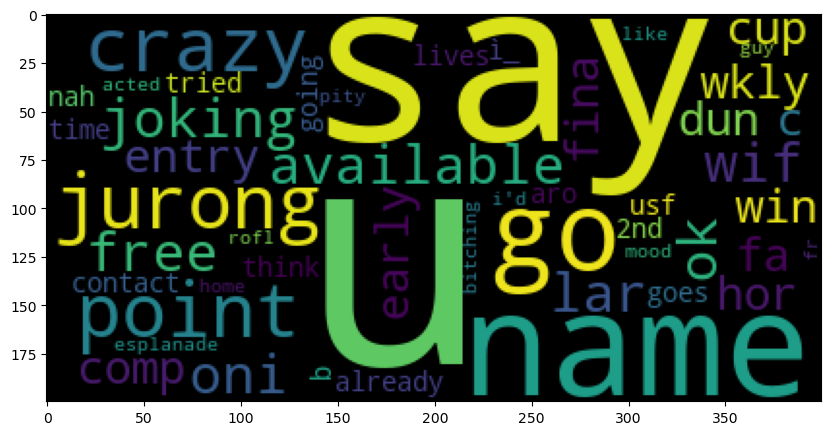

In [23]:
from wordcloud import WordCloud
cloud  = WordCloud(stopwords = stopwords.words("english"),max_words=50).generate(str(sp['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [24]:
# pip install WordCloud

## tdm (Term document Matrix)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [26]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

In [27]:
bow_transformer.vocabulary_

{'go': 3748,
 'jurong': 4644,
 'point': 6376,
 'crazy': 2463,
 'available': 1375,
 'bugis': 1840,
 'n': 5624,
 'great': 3845,
 'world': 9107,
 'la': 4803,
 'e': 2988,
 'buffet': 1838,
 'cine': 2178,
 'got': 3805,
 'amore': 1142,
 'wat': 8870,
 'ok': 5940,
 'lar': 4842,
 'joking': 4612,
 'wif': 9003,
 'u': 8534,
 'oni': 5972,
 'free': 3539,
 'entry': 3123,
 '2': 415,
 'wkly': 9059,
 'comp': 2294,
 'win': 9017,
 'fa': 3261,
 'cup': 2518,
 'final': 3385,
 'tkts': 8311,
 '21st': 435,
 'may': 5287,
 '2005': 422,
 'text': 8150,
 '87121': 838,
 'receive': 6774,
 'questionstd': 6665,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1228,
 '08452810075over18s': 72,
 'dun': 2974,
 'say': 7129,
 'early': 2995,
 'hor': 4175,
 'c': 1889,
 'already': 1116,
 'nah': 5631,
 'dont': 2882,
 'think': 8224,
 'goes': 3762,
 'usf': 8664,
 'lives': 5004,
 'around': 1279,
 'though': 8243,
 'freemsg': 3547,
 'hey': 4071,
 'darling': 2582,
 '3': 520,
 'weeks': 8923,
 'word': 9093,
 'back': 1426,
 'id': 4294,
 'like': 4

In [28]:
len(bow_transformer.vocabulary_)

## there are 9422unique words(after removing punctuations and stopwords)
## that when we create our tdm , our tdm have 9422 this many columns

9431

In [29]:
tdm=bow_transformer.transform(sp["x"])

In [30]:
tdm.shape

(5572, 9431)

In [31]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [32]:
## tdm is like our x variables

## Sampling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
tdm_train,tdm_test,train_y,test_y = train_test_split(tdm,sp["y"],test_size=.2)

## naive_bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [36]:
nb.fit(tdm_train,train_y)

MultinomialNB()

In [37]:
pred_nb=nb.predict(tdm_test)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[941,  19],
       [ 12, 143]], dtype=int64)

In [40]:
tab_nb.diagonal().sum()/tab_nb.sum()*100

97.21973094170404

## DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
dtc.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [44]:
pred_test1=dtc.predict(tdm_test)
pred_train1=dtc.predict(tdm_train)

In [45]:
tab_dt=confusion_matrix(test_y,pred_test1)
tab_dt

array([[946,  14],
       [ 24, 131]], dtype=int64)

In [46]:
tab_dt.diagonal().sum()/tab_dt.sum()*100

96.59192825112108

## LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logreg = LogisticRegression()
logreg.fit(tdm_train,train_y)

LogisticRegression()

In [49]:
pred_train =logreg.predict(tdm_train)
pred_test= logreg.predict(tdm_test)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
mat_test=confusion_matrix(test_y,pred_test)
mat_test

array([[959,   1],
       [ 18, 137]], dtype=int64)

In [52]:
mat_test.diagonal().sum()/mat_test.sum()*100

98.29596412556054

## Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')


In [54]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [55]:
pred_rfc= rfc.predict(tdm_test)

In [56]:
tab_rfc = confusion_matrix(pred_rfc,test_y)
tab_rfc

array([[960,  28],
       [  0, 127]], dtype=int64)

In [57]:
tab_rfc_cr.diagonal().sum()/tab_rfc_cr.sum()*100

NameError: name 'tab_rfc_cr' is not defined

In [ ]:
sp.head()

In [ ]:
sp=sp.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
sp.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [ ]:
sp.y.replace({'ham':0,'spam':1},inplace=True)

In [ ]:
sp.x=sp.x.str.lower()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
len(stopwords.words('english'))

In [ ]:
string.punctuation

In [ ]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [ ]:
sp['x'].apply(text_process)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

In [ ]:
bow_transformer

In [ ]:
bow_transformer.vocabulary_

In [ ]:
len(bow_transformer.vocabulary_)

In [ ]:
tdm=bow_transformer.transform(sp['x'])

In [ ]:
tdm.shape

In [ ]:
type(tdm)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,sp['y'],test_size=.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(tdm_train,train_y)

In [ ]:
pred_nb=nb.predict(tdm_test)

In [ ]:
pred_nb

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tab_nb=confusion_matrix(test_y,pred_nb)

In [ ]:
tab_nb